In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

from dataclasses import dataclass
from datetime import datetime
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd
import seaborn as sns

mpl.rcParams['figure.figsize'] = [8, 5]
sns.set_style('whitegrid', {'axes.labelcolor': '0', "text.color": '0', 'xtick.color': '0', 'ytick.color': '0', 'font.sans-serif': ['DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'],})
sns.set_context('notebook', font_scale=1)

### A quick look at 7-day mean/95% CI new cases

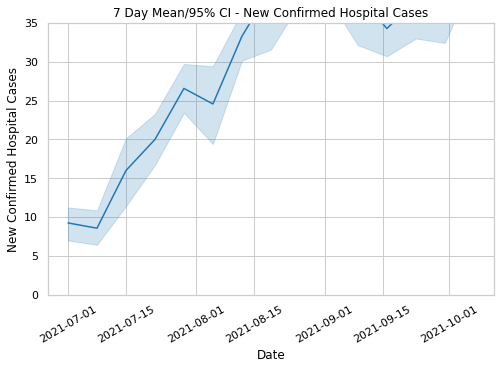

In [3]:
rdf=pd.read_csv('./data/reportedcases.csv', parse_dates=["Date"], date_parser=lambda x: datetime.strptime(x, "%Y-%m-%d"))
rdf.Date = rdf.Date.dt.round('7D')
ax=sns.lineplot(data=rdf, x='Date', y='HospitalCases')
ax.set_ylim((0,35))
ax.set_title('7 Day Mean/95% CI - New Confirmed Hospital Cases')
ax.set_ylabel('New Confirmed Hospital Cases')
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_hosp_7d_mean_ci95.png', bbox_inches='tight')

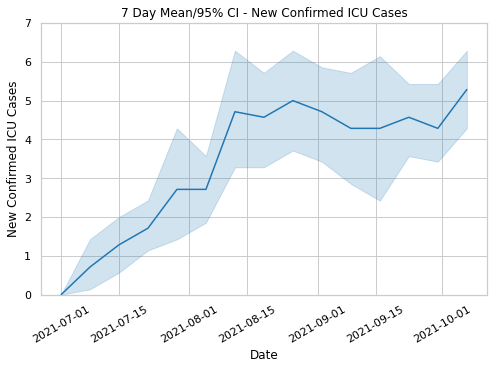

In [4]:
ax=sns.lineplot(data=rdf, x='Date', y='IcuCases')
ax.set_ylim((0,7))
ax.set_title('7 Day Mean/95% CI - New Confirmed ICU Cases')
ax.set_ylabel('New Confirmed ICU Cases')
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_icu_7d_mean_ci95.png', bbox_inches='tight')

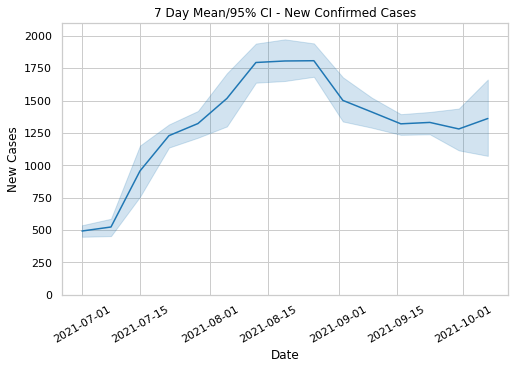

In [5]:
ax=sns.lineplot(data=rdf, x='Date', y='Cases')
ax.set_ylim((0,2100))
ax.set_title('7 Day Mean/95% CI - New Confirmed Cases')
ax.set_ylabel('New Cases')
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_cases_7d_mean_ci95.png', bbox_inches='tight')

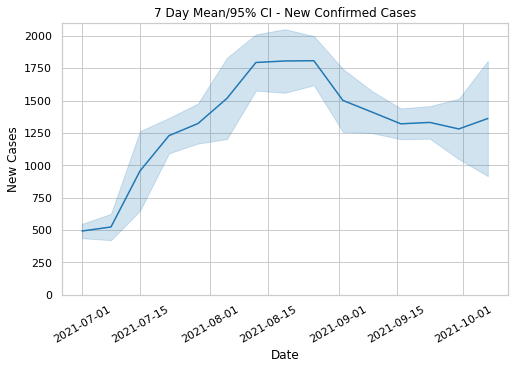

In [6]:
ax=sns.lineplot(data=rdf, x='Date', y='Cases', ci='sd')
ax.set_ylim((0,2100))
ax.set_title('7 Day Mean/95% CI - New Confirmed Cases')
ax.set_ylabel('New Cases')
plt.xticks(rotation=30);
#plt.savefig(f'./figures/reported_cases_7d_mean_ci95.png', bbox_inches='tight')

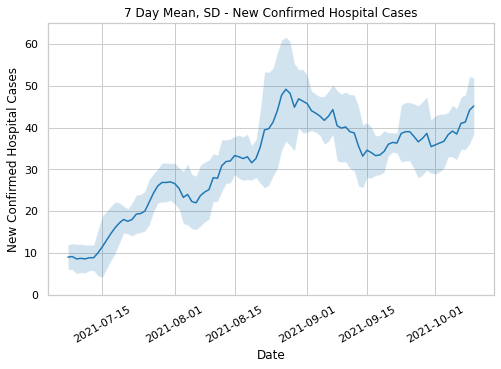

In [7]:
mdf=pd.read_csv('./data/reportedcases.csv', parse_dates=["Date"], date_parser=lambda x: datetime.strptime(x, "%Y-%m-%d"))
mdf['7dhosp']=mdf.HospitalCases.rolling(7).mean().dropna()
ax=sns.lineplot(data=mdf, x='Date', y='7dhosp')
ax.set_ylim((0,65))
ax.set_title('7 Day Mean, SD - New Confirmed Hospital Cases')
ax.set_ylabel('New Confirmed Hospital Cases')
hospstd = mdf.HospitalCases.rolling(7).std()
ax.fill_between(mdf.Date, mdf['7dhosp'] - hospstd, mdf['7dhosp'] + hospstd, alpha=0.2)
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_hosp_7d_mean_sd.png', bbox_inches='tight')

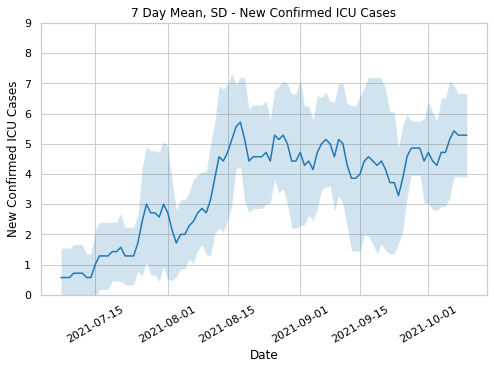

In [8]:
mdf['7dicu']=mdf.IcuCases.rolling(7).mean().dropna()
ax=sns.lineplot(data=mdf, x='Date', y='7dicu')
ax.set_ylim((0,9))
ax.set_title('7 Day Mean, SD - New Confirmed ICU Cases')
ax.set_ylabel('New Confirmed ICU Cases')
icustd = mdf.IcuCases.rolling(7).std()
ax.fill_between(mdf.Date, mdf['7dicu'] - icustd, mdf['7dicu'] + icustd, alpha=0.2)
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_icu_7d_mean_sd.png', bbox_inches='tight')

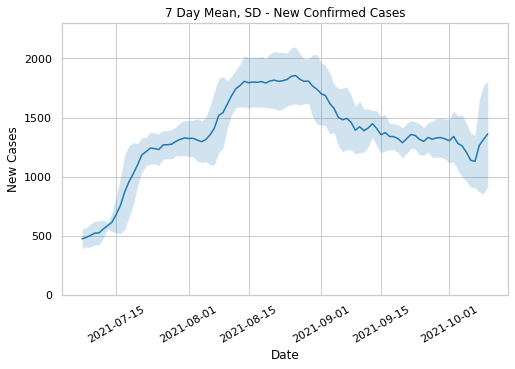

In [9]:
mdf['7dcases']=mdf.Cases.rolling(7).mean().dropna()
ax=sns.lineplot(data=mdf, x='Date', y='7dcases')
ax.set_ylim((0,2300))
ax.set_title('7 Day Mean, SD - New Confirmed Cases')
ax.set_ylabel('New Cases')
casesstd = mdf.Cases.rolling(7).std()
ax.fill_between(mdf.Date, mdf['7dcases'] - casesstd, mdf['7dcases'] + casesstd, alpha=0.2)
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_cases_7d_mean_sd.png', bbox_inches='tight')

### A quick look at the percentage of Confirmed Hospital Cases that are **non-admission**

Uses a daily snapshot of:

* [Covid-19 Acute Hospital Historic Summary](https://covid-19.geohive.ie/datasets/fe9bb23592ec4142a4f4c2c9bd32f749_0/explore?location=53.385818%2C-8.057012%2C7.64&showTable=true) ([CSV](https://opendata.arcgis.com/api/v3/datasets/fe9bb23592ec4142a4f4c2c9bd32f749_0/downloads/data?format=csv&spatialRefId=4326))

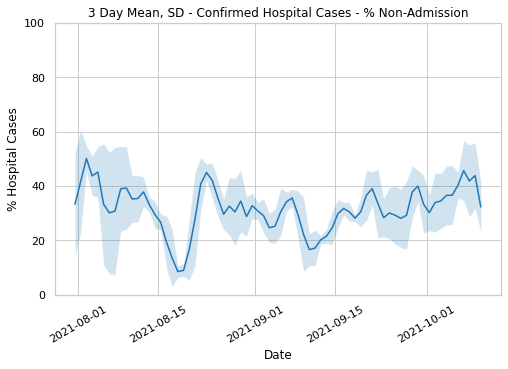

In [10]:
hdf=pd.read_csv('./data/Covid19AcuteHospitalHistoricSummaryOpenData.csv', parse_dates=["Date"], date_parser=lambda x: datetime.strptime(x, "%Y/%m/%d %H:00:00+00"))
hdf=hdf[hdf.Date>='2021-07-01'][['Date', 'SUM_no_new_admissions_covid19_p', 'SUM_number_of_new_covid_19_cases_co']].dropna()
hdf['perc_nonadmiss']=hdf[['SUM_no_new_admissions_covid19_p', 'SUM_number_of_new_covid_19_cases_co']].dropna().apply(lambda x:((x[1]-x[0])*100)/x[1], axis=1)
hdf['3dperc']=hdf.perc_nonadmiss.rolling(3).mean().dropna()
ax=sns.lineplot(data=hdf, x='Date', y='3dperc')
ax.set_ylim((0,100))
ax.set_title('3 Day Mean, SD - Confirmed Hospital Cases - % Non-Admission')
ax.set_ylabel('% Hospital Cases')
percstd = hdf.perc_nonadmiss.rolling(3).std()
ax.fill_between(hdf.Date, hdf['3dperc'] - percstd, hdf['3dperc'] +percstd, alpha=0.2)
plt.xticks(rotation=30);
#plt.savefig(f'./figures/reported_hosp_7d_mean_sd.png', bbox_inches='tight')

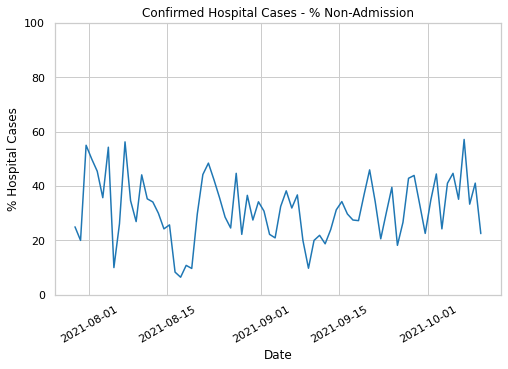

In [11]:
ax=sns.lineplot(data=hdf, x='Date', y='perc_nonadmiss')
ax.set_ylim((0,100))
ax.set_title('Confirmed Hospital Cases - % Non-Admission')
ax.set_ylabel('% Hospital Cases')
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_hosp_perc_nonadmiss.png', bbox_inches='tight')

In [12]:
hdf.perc_nonadmiss.describe()

count    74.000000
mean     31.592728
std      11.662750
min       6.451613
25%      24.060606
50%      31.582447
75%      39.209986
max      57.142857
Name: perc_nonadmiss, dtype: float64

In [13]:
hdf[['SUM_no_new_admissions_covid19_p', 'SUM_number_of_new_covid_19_cases_co']].sum()

SUM_no_new_admissions_covid19_p        1856.0
SUM_number_of_new_covid_19_cases_co    2733.0
dtype: float64